In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 1.0
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_10_51_300_1.0_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_10_51_300_1.0_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9177

Best Fitness:	700.4010
Solution:	700.0000
Diff:		0.4010

[0:12:51][----------] 1.96% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.8847

Best Fitness:	700.4414
Solution:	700.0000
Diff:		0.4414

[0:25:07][----------] 3.92% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9516

Best Fitness:	700.5164
Solution:	700.0000
Diff:		0.5164

[0:37:18][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	701.0380

Best Fitness:	700.6323
Solution:	700.0000
Diff:		0.6323

[0:47:48][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9616

Best Fitness:	700.4741
Solution:	700.0000
Diff:		0.4741

[0:58:18][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.8435

Best Fitness:	700.3576
Solution:	700.0000
Diff:		0.3576

[1:08:29][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9481

Best Fitness:	700.6054
Solution:	700.0000
Diff:		0.6054

[1:18:52][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9122

Best Fitness:	700.5732
Solution:	700.0000
Diff:		0.5732

[1:29:03][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9546

Best Fitness:	700.3826
Solution:	700.0000
Diff:		0.3826

[1:38:38][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9148

Best Fitness:	700.3641
Solution:	700.0000
Diff:		0.3641

[1:47:41][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9926

Best Fitness:	700.6176
Solution:	700.0000
Diff:		0.6176

[1:56:42][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	701.0388

Best Fitness:	700.6894
Solution:	700.0000
Diff:		0.6894

[2:05:55][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	701.0052

Best Fitness:	700.6122
Solution:	700.0000
Diff:		0.6122

[2:14:45][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9912

Best Fitness:	700.6384
Solution:	700.0000
Diff:		0.6384

[2:23:22][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9312

Best Fitness:	700.5344
Solution:	700.0000
Diff:		0.5344

[2:31:07][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9036

Best Fitness:	700.5336
Solution:	700.0000
Diff:		0.5336

[2:38:57][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9306

Best Fitness:	700.4284
Solution:	700.0000
Diff:		0.4284

[2:46:37][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9622

Best Fitness:	700.4386
Solution:	700.0000
Diff:		0.4386

[2:54:20][####------] 35.29% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9709

Best Fitness:	700.4936
Solution:	700.0000
Diff:		0.4936

[3:02:04][####------] 37.25% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.4211

Best Fitness:	700.1447
Solution:	700.0000
Diff:		0.1447

[3:09:23][####------] 39.22% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.8816

Best Fitness:	700.5020
Solution:	700.0000
Diff:		0.5020

[3:15:57][####------] 41.18% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9843

Best Fitness:	700.4027
Solution:	700.0000
Diff:		0.4027

[3:22:25][####------] 43.14% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.8829

Best Fitness:	700.4444
Solution:	700.0000
Diff:		0.4444

[3:29:00][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.8076

Best Fitness:	700.2914
Solution:	700.0000
Diff:		0.2914

[3:35:36][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9144

Best Fitness:	700.4989
Solution:	700.0000
Diff:		0.4989

[3:42:01][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.8792

Best Fitness:	700.4622
Solution:	700.0000
Diff:		0.4622

[3:47:44][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9165

Best Fitness:	700.4941
Solution:	700.0000
Diff:		0.4941

[3:53:13][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9343

Best Fitness:	700.4184
Solution:	700.0000
Diff:		0.4184

[3:58:38][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9557

Best Fitness:	700.5898
Solution:	700.0000
Diff:		0.5898

[4:04:01][######----] 56.86% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9218

Best Fitness:	700.5857
Solution:	700.0000
Diff:		0.5857

[4:09:28][######----] 58.82% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9249

Best Fitness:	700.4584
Solution:	700.0000
Diff:		0.4584

[4:14:13][######----] 60.78% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.8960

Best Fitness:	700.5800
Solution:	700.0000
Diff:		0.5800

[4:18:33][######----] 62.75% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9592

Best Fitness:	700.6247
Solution:	700.0000
Diff:		0.6247

[4:22:53][######----] 64.71% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9913

Best Fitness:	700.5265
Solution:	700.0000
Diff:		0.5265

[4:27:11][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.8771

Best Fitness:	700.3728
Solution:	700.0000
Diff:		0.3728

[4:31:43][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	701.0981

Best Fitness:	700.7522
Solution:	700.0000
Diff:		0.7522

[4:35:55][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9699

Best Fitness:	700.4838
Solution:	700.0000
Diff:		0.4838

[4:39:28][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9744

Best Fitness:	700.5179
Solution:	700.0000
Diff:		0.5179

[4:42:48][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9161

Best Fitness:	700.3296
Solution:	700.0000
Diff:		0.3296

[4:46:07][########--] 76.47% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9250

Best Fitness:	700.4592
Solution:	700.0000
Diff:		0.4592

[4:49:26][########--] 78.43% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9620

Best Fitness:	700.5586
Solution:	700.0000
Diff:		0.5586

[4:52:41][########--] 80.39% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9577

Best Fitness:	700.5503
Solution:	700.0000
Diff:		0.5503

[4:55:36][########--] 82.35% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9429

Best Fitness:	700.6264
Solution:	700.0000
Diff:		0.6264

[4:58:14][########--] 84.31% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9355

Best Fitness:	700.4548
Solution:	700.0000
Diff:		0.4548

[5:00:53][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.8558

Best Fitness:	700.4664
Solution:	700.0000
Diff:		0.4664

[5:03:31][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	701.0141

Best Fitness:	700.5162
Solution:	700.0000
Diff:		0.5162

[5:06:09][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.8930

Best Fitness:	700.4656
Solution:	700.0000
Diff:		0.4656

[5:08:32][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9436

Best Fitness:	700.4484
Solution:	700.0000
Diff:		0.4484

[5:10:47][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.8748

Best Fitness:	700.3293
Solution:	700.0000
Diff:		0.3293

[5:13:01][##########] 96.08% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.9225

Best Fitness:	700.5311
Solution:	700.0000
Diff:		0.5311

[5:15:16][##########] 98.04% 

Optimization ended due to max fitness evals (max = 100000.0, curr = 99900)


#Generations:	331

#FitnessEvals:	99900

Mean Fitness:	700.8951

Best Fitness:	700.4958
Solution:	700.0000
Diff:		0.4958

[5:17:38][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

5:17:38

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
326,0.730341,0.916759,0.844299,1.018574,0.72857,1.018716,0.785966,0.963606,0.746988,0.799775,...,0.983525,0.842819,0.812446,0.923317,1.011701,0.825888,0.982007,0.863461,0.871809,50
327,0.730341,0.916759,0.844299,1.018574,0.72857,1.018716,0.785966,0.963606,0.746988,0.799775,...,0.983525,0.842819,0.812446,0.923317,1.011701,0.825888,0.982007,0.863461,0.871809,50
328,0.730341,0.916759,0.844299,1.018574,0.72857,1.018716,0.785966,0.963606,0.746988,0.799775,...,0.983525,0.842819,0.812446,0.923317,1.011701,0.825888,0.982007,0.863461,0.871809,50
329,0.730341,0.916759,0.844299,1.018574,0.72857,1.018716,0.785966,0.963606,0.746988,0.799775,...,0.983525,0.842819,0.812446,0.923317,1.011701,0.825888,0.982007,0.863461,0.871809,50
330,0.730341,0.916759,0.844299,1.018574,0.72857,1.018716,0.785966,0.963606,0.746988,0.799775,...,0.983525,0.842819,0.812446,0.923317,1.011701,0.825888,0.982007,0.863461,0.871809,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.401022391547599

Best error for run 1: 0.44135285127424595

Best error for run 2: 0.5163842972435759

Best error for run 3: 0.6323337932093409

Best error for run 4: 0.47413876754580997

Best error for run 5: 0.3575864397399755

Best error for run 6: 0.6053628128104265

Best error for run 7: 0.5731621450077

Best error for run 8: 0.3825863196944965

Best error for run 9: 0.36407074877149626

Best error for run 10: 0.6175853067248909

Best error for run 11: 0.6894493422604455

Best error for run 12: 0.6122472597052138

Best error for run 13: 0.6383859405966632

Best error for run 14: 0.5343679093284663

Best error for run 15: 0.5335768780512353

Best error for run 16: 0.42839893761015446

Best error for run 17: 0.43855383465086106

Best error for run 18: 0.4935699312846964

Best error for run 19: 0.1447067629068215

Best error for run 20: 0.5020470880972425

Best error for run 21: 0.40266855671586654

Best error for run 22: 0.44444023935932364

Best error for run 23: 0.2913686108603315

Best error for run 24: 0.49887849443973664

Best error for run 25: 0.4621575902092445

Best error for run 26: 0.4940561932722858

Best error for run 27: 0.4184411700559849

Best error for run 28: 0.589769687205262

Best error for run 29: 0.5857045852798137

Best error for run 30: 0.4584078938096354

Best error for run 31: 0.579970819565574

Best error for run 32: 0.6246792031778341

Best error for run 33: 0.5264531091274876

Best error for run 34: 0.3728025820533958

Best error for run 35: 0.7521613854953557

Best error for run 36: 0.48378184328873886

Best error for run 37: 0.5179055701444213

Best error for run 38: 0.32964117417839134

Best error for run 39: 0.45915342136686377

Best error for run 40: 0.5586196749001147

Best error for run 41: 0.5502778425702672

Best error for run 42: 0.6264181313596282

Best error for run 43: 0.45475375936302953

Best error for run 44: 0.46643318841870496

Best error for run 45: 0.5162393374728254

Best error for run 46: 0.46557130379085265

Best error for run 47: 0.4483553888305778

Best error for run 48: 0.3293016695654387

Best error for run 49: 0.5310871717988448

Best error for run 50: 0.4957922881085324

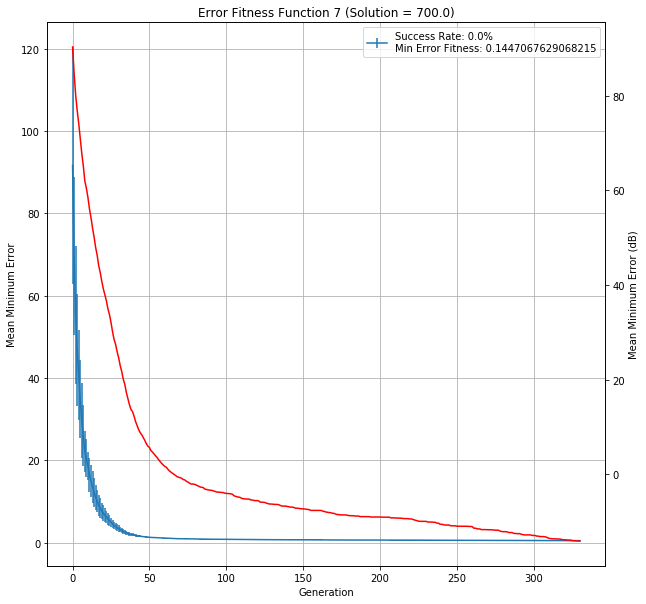

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_10_51_300_1.0_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,10,1.0,0.401022,0.441353,0.516384,0.632334,0.474139,0.357586,...,0.466433,0.516239,0.465571,0.448355,0.329302,0.531087,0.495792,0.492474,5:17:38,99900
